# AI Lab 2020
### Laboratorium 1, Łukasz Ozimek, 236529
### Polecenia:
1. Proszę wykonać te same testy co w instrukcji Lab01 na bazie danych Drug Review Dataset:<br>
    Cały kod dostępny jest poniżej. Jako enkoder zastosowano LabelEncoder z biblioteki sklearn. [Hiperlink do komórki z enkoderem](#encoder_cell). Opuszczono kolumnę 'review', gdyż wykorzystanie jej wymagałoby zaawansowanego systemu rozpoznawanie tekstu, co nie było celem tego laboratorium. Z powodu różnorodności danych kolumna ta byłaby bezużyteczna również po zastosowaniu na niej enkodera. Dane na temat daty rozłożono na 3 kolumny (rok, miesiąc, dzień) aby model mógł się nauczyć osobno wagi dla lat, miesięcy i dni, po czym usunięto oryginalną kolumnę 'date'. <br><br>

1. W jaki sposób należy rozwiązać ładowanie danych z pliku .tsv? <br>
    Za pomocą metody pandas.read_table. <br><br>

1. Jakie wyniki dokładności wybranych algorytmów otrzymujemy? <br>
    * Logistic Regression: 0.044309 (0.000582)
    * Linear Discriminant Analysis: 0.044801 (0.000729)
    * Decision Tree: 0.100575 (0.001115)
    * Naive Bayes: 0.051765 (0.004836)
    * KNN: 0.094066 (0.000341)

    [Hiperlink do komórki z wykresem porównującym algorytmy](#graph_cell)


### Kod:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_train = pd.read_table('data/drugsComTrain_raw.tsv') # Importing the test data

In [3]:
df_train.head(20)

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,"May 20, 2012",27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,"December 14, 2009",17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,"November 27, 2016",37
5,155963,Cialis,Benign Prostatic Hyperplasia,"""2nd day on 5mg started to work with rock hard...",2.0,"November 28, 2015",43
6,165907,Levonorgestrel,Emergency Contraception,"""He pulled out, but he cummed a bit in me. I t...",1.0,"March 7, 2017",5
7,102654,Aripiprazole,Bipolar Disorde,"""Abilify changed my life. There is hope. I was...",10.0,"March 14, 2015",32
8,74811,Keppra,Epilepsy,""" I Ve had nothing but problems with the Kepp...",1.0,"August 9, 2016",11
9,48928,Ethinyl estradiol / levonorgestrel,Birth Control,"""I had been on the pill for many years. When m...",8.0,"December 8, 2016",1


In [4]:
# The "Unnamed: 0" column seems to be some sort of leftover index, so we'll drop it
df_train.drop('Unnamed: 0',axis=1,inplace=True)
df_train.describe()

,rating,usefulCount
count,161297.000000,161297.000000
mean,6.994377,28.004755
std,3.272329,36.403742
min,1.000000,0.000000
25%,5.000000,6.000000
50%,8.000000,16.000000
75%,10.000000,36.000000
max,10.000000,1291.000000


In [5]:
print('Dataset size:')
print(df_train.shape)
print()
print(df_train.groupby('drugName').size())

Dataset size:
(161297, 6)

drugName
A + D Cracked Skin Relief                1
A / B Otic                               1
Abacavir / dolutegravir / lamivudine    52
Abacavir / lamivudine / zidovudine       1
Abatacept                               19
                                        ..
Zyvox                                   17
ZzzQuil                                  2
depo-subQ provera 104                    1
ella                                    51
femhrt                                   3
Length: 3436, dtype: int64


Histogram of condition values returned a type error about floats existing in a string column, which means there are NaN values. We'll see how many of them there are, and if there's only a few of them we'll simply drop them.

In [6]:
print('Train dataset:')
print(df_train[df_train['condition'].isna()].shape)
print(100*df_train[df_train['condition'].isna()].shape[0]/df_train.shape[0], '% of the column is NaN')

Train dataset:
(899, 6)
0.5573569254232875 % of the column is NaN


In [7]:
nan_idx = df_train[df_train['condition'].isna()].index # Finding the indexes of NaN values
df_train.drop(nan_idx, inplace=True) #Deleting the nan positions
print(df_train[df_train['condition'].isna()].shape)

(0, 6)


(array([6.3504e+04, 2.4430e+04, 2.0958e+04, 8.0180e+03, 1.0884e+04,
        2.6800e+03, 4.1410e+03, 2.8620e+03, 2.9550e+03, 3.6190e+03,
        2.0280e+03, 1.6600e+03, 1.1580e+03, 1.5160e+03, 1.7730e+03,
        8.4800e+02, 1.0410e+03, 6.5800e+02, 7.4400e+02, 7.3000e+02,
        2.9900e+02, 2.9100e+02, 4.6000e+02, 4.3000e+02, 5.3600e+02,
        1.5800e+02, 2.2700e+02, 1.5500e+02, 2.1200e+02, 1.3100e+02,
        1.3600e+02, 1.2300e+02, 9.6000e+01, 9.4000e+01, 1.5100e+02,
        9.0000e+01, 9.0000e+01, 6.2000e+01, 5.3000e+01, 6.1000e+01,
        5.0000e+01, 3.4000e+01, 5.5000e+01, 3.8000e+01, 3.3000e+01,
        3.2000e+01, 2.9000e+01, 2.5000e+01, 2.2000e+01, 1.8000e+01]),
 array([  0.  ,  17.66,  35.32,  52.98,  70.64,  88.3 , 105.96, 123.62,
        141.28, 158.94, 176.6 , 194.26, 211.92, 229.58, 247.24, 264.9 ,
        282.56, 300.22, 317.88, 335.54, 353.2 , 370.86, 388.52, 406.18,
        423.84, 441.5 , 459.16, 476.82, 494.48, 512.14, 529.8 , 547.46,
        565.12, 582.78, 600.44

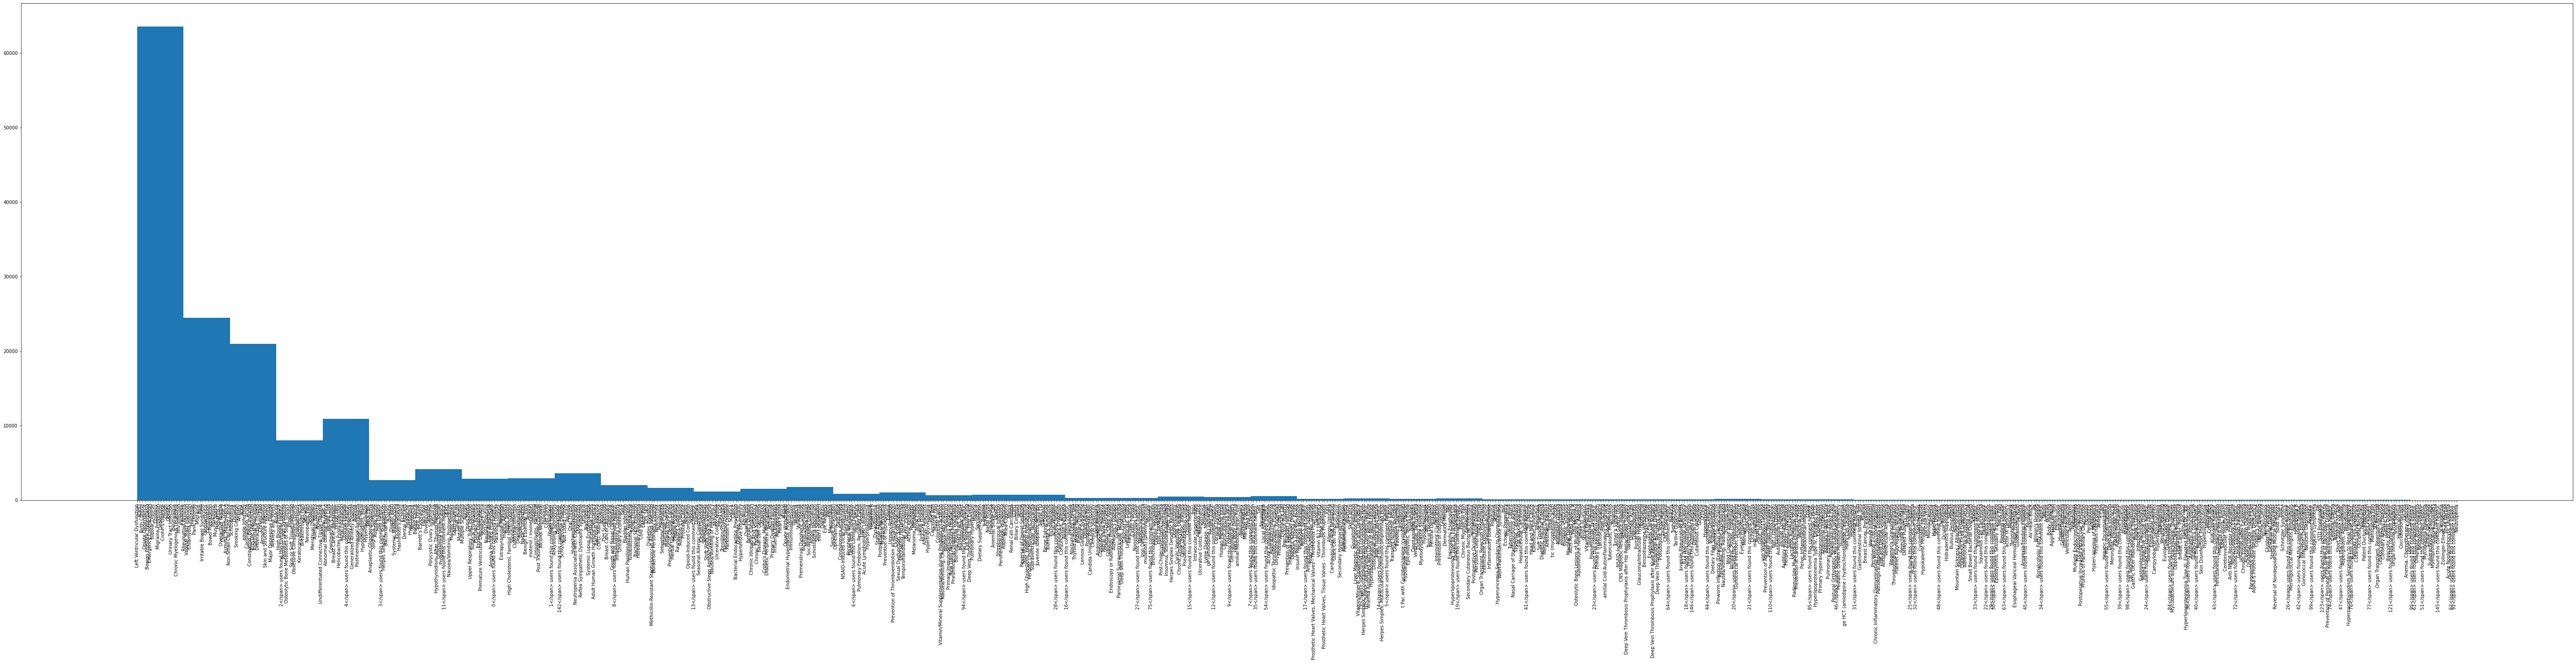

In [8]:
plt.figure(figsize=(100,20))
plt.xticks(rotation='vertical')
plt.hist(df_train['condition'],bins=50)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021CD037F460>,
      dtype=object)

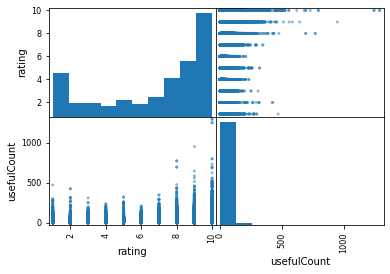

In [9]:
pd.plotting.scatter_matrix(df_train)

As expected, since there is only 1 non-categorical numeric column there are no linear corelations. The 'rating' column distribution is pretty similar to rating usually seen on the Internet, so mostly positive with some negative ones and quite few in the middle. Intersetingly for most drugs there are less than 100 reviews, but for some the number seems to be reaching 1000. It must be caused by some drugs being far more popular than others.

In [10]:
df_test = pd.read_table('data/drugsComTest_raw.tsv') # Importing the validation dataset
df_test.head()

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10.0,"February 28, 2012",22
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8.0,"May 17, 2009",17
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9.0,"September 29, 2017",3
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9.0,"March 5, 2017",35
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9.0,"October 22, 2015",4


In [11]:
df_test.drop('Unnamed: 0',axis=1,inplace=True)
print(df_test.shape)
df_test.head()

(53766, 6)


,drugName,condition,review,rating,date,usefulCount
0,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10.0,"February 28, 2012",22
1,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8.0,"May 17, 2009",17
2,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9.0,"September 29, 2017",3
3,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9.0,"March 5, 2017",35
4,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9.0,"October 22, 2015",4


Since the test dataset is also labeled it can be used as validation dataset and there is no need to use the sklearn's train_test_split function. Before we move on to creating the model let's modify the features. We'll drop the reviews altogether, since creating a model that could effectively use them is not the aim of this class. The dates should be either dropeed or put into their seperate fields to help the model distinguish between years, months and days in case they have varying importance.

In [12]:
print('Test set:')
print(df_test[df_test['condition'].isna()].shape)
print(100*df_test[df_test['condition'].isna()].shape[0]/df_test.shape[0], '% of the column is NaN')

Test set:
(295, 6)
0.5486738831231633 % of the column is NaN


In [13]:
nan_idx = df_test[df_test['condition'].isna()].index # Finding the indexes of NaN values
df_test.drop(nan_idx, inplace=True) #Deleting the nan positions
print(df_test[df_test['condition'].isna()].shape)

(0, 6)


In [14]:
df_train.drop('review', axis=1,inplace=True)
df_test.drop('review', axis=1,inplace=True)
df_train['date'] = pd.to_datetime(df_train['date'])
df_test['date'] = pd.to_datetime(df_test['date'])
def datetime_to_fields(dataframe):
    dataframe['dateYear'] = pd.DatetimeIndex(dataframe['date']).year
    dataframe['dateMonth'] = pd.DatetimeIndex(dataframe['date']).month
    dataframe['dateDay'] = pd.DatetimeIndex(dataframe['date']).day
datetime_to_fields(df_train)
df_train.drop('date', axis=1,inplace=True)
datetime_to_fields(df_test)
df_test.drop('date', axis=1,inplace=True)
df_train.head()

,drugName,condition,rating,usefulCount,dateYear,dateMonth,dateDay
0,Valsartan,Left Ventricular Dysfunction,9.0,27,2012,5,20
1,Guanfacine,ADHD,8.0,192,2010,4,27
2,Lybrel,Birth Control,5.0,17,2009,12,14
3,Ortho Evra,Birth Control,8.0,10,2015,11,3
4,Buprenorphine / naloxone,Opiate Dependence,9.0,37,2016,11,27


Now we'll need to transform the categorical string columns into numbers using the LabelEncoder. <a id='encoder_cell'></a>

In [15]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
for col in ['drugName', 'condition']:
    df_train[col] = labelencoder.fit_transform(df_train[col])
    df_test[col] = labelencoder.fit_transform(df_test[col])
    
# Creating the Y values by popping them from the dataframe   
df_train_y = df_train.pop('drugName') 
df_test_y = df_test.pop('drugName')

df_train.head()

,condition,rating,usefulCount,dateYear,dateMonth,dateDay
0,466,9.0,27,2012,5,20
1,73,8.0,192,2010,4,27
2,165,5.0,17,2009,12,14
3,165,8.0,10,2015,11,3
4,574,9.0,37,2016,11,27


In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, plot_confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold, cross_val_score
# No SVC because the dataset it too large to use it quickly and efficiently, which causes it to take too long to train
print('Modules imported')
models = []
models.append(('Logistic Regression', LogisticRegression(solver='liblinear',multi_class='ovr')))
models.append(('Linear Discriminant Analysis', LinearDiscriminantAnalysis()))
models.append(('Decision Tree', DecisionTreeClassifier()))
models.append(('Naive Bayes', GaussianNB()))
models.append(('KNN', KNeighborsClassifier()))
results = []
names = []
print('Arrays created, commencing training')
for name, model in models:
    kfold = KFold(n_splits=3)
    cv_results = cross_val_score(model, df_train, df_train_y, cv=kfold,scoring='accuracy',n_jobs=-1)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

Modules imported
Arrays created, commencing training
Logistic Regression: 0.044309 (0.000582)
Linear Discriminant Analysis: 0.044801 (0.000729)
Decision Tree: 0.100575 (0.001115)
Naive Bayes: 0.051765 (0.004836)
KNN: 0.094066 (0.000341)


<a id='graph_cell'></a>

([<matplotlib.axis.XTick at 0x21ce21fa520>,
 [Text(0, 0, 'Logistic Regression'),
  Text(0, 0, 'Linear Discriminant Analysis'),
  Text(0, 0, 'Decision Tree'),
  Text(0, 0, 'Naive Bayes'),
  Text(0, 0, 'KNN')])

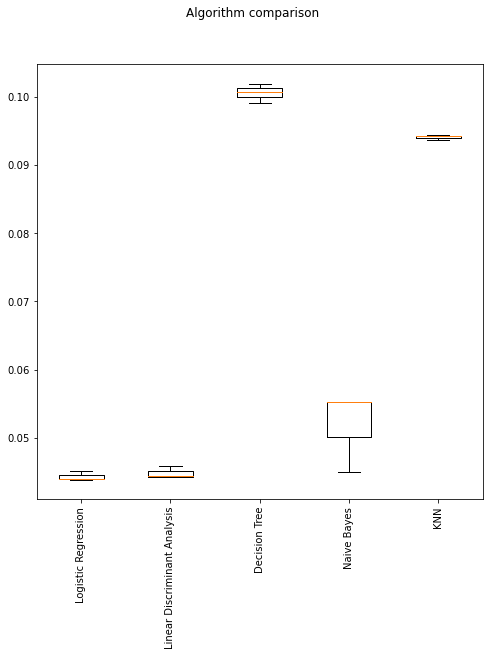

In [34]:
plt.figure(figsize=(8,8))
plt.suptitle('Algorithm comparison')
plt.boxplot(results)
plt.xticks([1,2,3,4,5],names,rotation=90)

In [39]:
model = DecisionTreeClassifier()
model.fit(df_train,df_train_y)
predictions = model.predict(df_test)

In [41]:
print('Training dataset: ', model.score(df_train,df_train_y))
print('Validation dataset: ', accuracy_score(df_test_y,predictions))

Training dataset:  0.6958253843564134
Validation dataset:  0.00024312244020123058


In [47]:
classification_report(df_test_y,predictions)

C:\Users\lukoz\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lukoz\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'              precision    recall  f1-score   support\n\n           0       0.00      0.00      0.00         1\n           1       0.00      0.00      0.00        18\n           2       0.00      0.00      0.00         3\n           3       0.00      0.00      0.00         6\n           4       0.00      0.00      0.00       147\n           5       0.00      0.00      0.00         1\n           6       0.00      0.00      0.00         1\n           7       0.00      0.00      0.00         3\n           8       0.00      0.00      0.00         1\n           9       0.00      0.00      0.00        47\n          10       0.00      0.00      0.00         2\n          11       0.00      0.00      0.00         1\n          12       0.00      0.00      0.00        34\n          13       0.00      0.00      0.00        10\n          14       0.00      0.00      0.00         1\n          15       0.00      0.00      0.00         1\n          16       0.00      0.00      0.00       111\n       

The decision tree classifier was clearly superior for this task, however it heavily overfit the data. We can see that by the fact, that it achieved 69% accuracy on the training set and only 0,02% on the validation set. The classification report also point to the fact, that almost all samples were labeled wrong by the model. However, the aim of this project wasn't to achieve high model performance so this project is now over.